# The NSGA-II algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils.objects import *
from utils.main import *
from utils.nsgaii import *
from utils.offloading import *
from utils.plots import *

from tqdm.notebook import tqdm

## Importing the data

In [2]:
rsu = pd.read_csv('data/rsu.csv')
es = pd.read_csv('data/es.csv')
tasks = pd.read_csv('data/tasks.csv')

In [3]:
rsu_bank = populate_rsus(rsu)
es_bank = populate_ess(es)
tasks_bank = populate_tasks(tasks)

In [4]:
len(rsu_bank), len(es_bank), len(tasks_bank)

(20, 5, 100)

## Defining the nsga2 function

In [5]:
# Define the NSGA2 algorithm
def nsga2():
    global POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY
    # Create an initial population of candidate solutions
    population = [Individual(get_random_network(rsu_bank, es_bank)) for _ in range(POPULATION_SIZE)]
    
    # Iterate until the maximum number of generations is reached
    for _ in tqdm(range(MAX_GENERATIONS)):
        # Create an empty list to store the offspring generated in this generation
        offspring = []
        
        # Perform crossover and mutation operations to generate new offspring
        while len(offspring) < POPULATION_SIZE:
            # Select two parent solutions using tournament selection
            parent1 = tournament_selection(population, tournament_size=TOURNAMENT_SIZE)
            parent2 = tournament_selection(population, tournament_size=TOURNAMENT_SIZE)
            
            # Perform crossover operation with probability CROSSOVER_PROBABILITY
            if random.random() < CROSSOVER_PROBABILITY:
                child1, child2 = crossing(parent1, parent2)
            else:
                child1, child2 = parent1, parent2
                
            # Perform mutation operation on each child with probability MUTATION_PROBABILITY
            if random.random() < MUTATION_PROBABILITY:
                child1 = mutation(child1)
                child2 = mutation(child2)
            
            # Add the new offspring to the list
            offspring.append(child1)
            offspring.append(child2)
        
        
        # Combine the parent and offspring populations into a single population for sorting and selection
        combined_population = population + offspring
        
        # Perform non-dominated sorting and crowding distance assignment
        fronts = non_dominated_sorting(combined_population)
        fronts = crowding_distance(fronts)
        
        # Select the next generation of candidate solutions using the non-dominated sorting and crowding distance
        new_population = []
        i = 0
        while len(new_population) < POPULATION_SIZE and i < len(fronts):
            # Select the ith front from the non-dominated sorting
            front = fronts[i]
            
            # Sort the solutions in the front by their crowding distance
            front = sorted(front, key=lambda x: x.crowding_distance, reverse=True)
            
            # Add the solutions to the new population until the population size is reached
            for solution in front:
                if len(new_population) < POPULATION_SIZE:
                    new_population.append(solution)
                else:
                    break
            
            # Move to the next front
            i += 1
        
        # Set the current population and fitness values to the new population and fitness values
        population = new_population
        
    # Return the final population and fitness values
    return population


## Testing multiple variables

  0%|          | 0/1 [00:00<?, ?it/s]

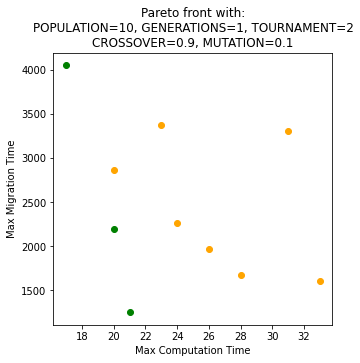

In [11]:
Individual.__instances__ = []

POPULATION_SIZE = 10
MAX_GENERATIONS = 1
TOURNAMENT_SIZE = 2
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1
test = nsga2()

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

  0%|          | 0/1 [00:00<?, ?it/s]

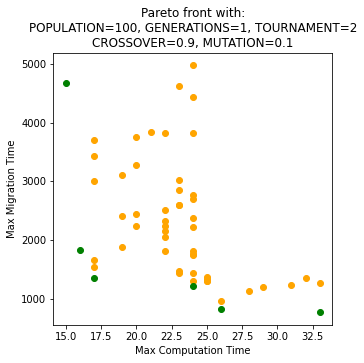

In [12]:
Individual.__instances__ = []

POPULATION_SIZE = 100
MAX_GENERATIONS = 1
TOURNAMENT_SIZE = 2
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1
test = nsga2()

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

  0%|          | 0/10 [00:00<?, ?it/s]

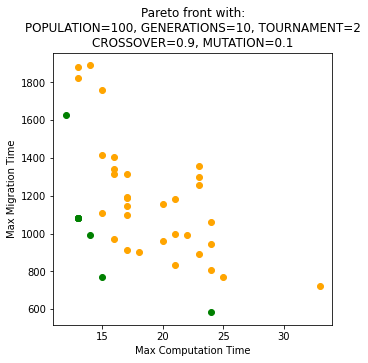

In [13]:
Individual.__instances__ = []

POPULATION_SIZE = 100
MAX_GENERATIONS = 10
TOURNAMENT_SIZE = 2
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1
test = nsga2()

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

  0%|          | 0/50 [00:00<?, ?it/s]

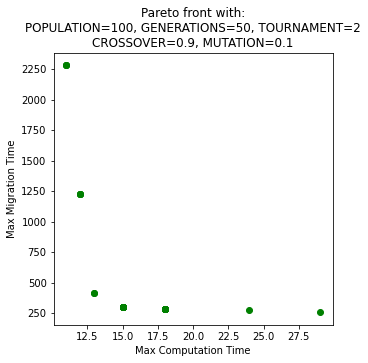

In [14]:
Individual.__instances__ = []

POPULATION_SIZE = 100
MAX_GENERATIONS = 50
TOURNAMENT_SIZE = 2
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1
test = nsga2()

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

  0%|          | 0/50 [00:00<?, ?it/s]

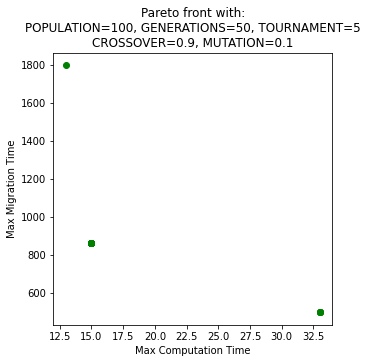

In [15]:
Individual.__instances__ = []

POPULATION_SIZE = 100
MAX_GENERATIONS = 50
TOURNAMENT_SIZE = 5
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1
test = nsga2()

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

  0%|          | 0/50 [00:00<?, ?it/s]

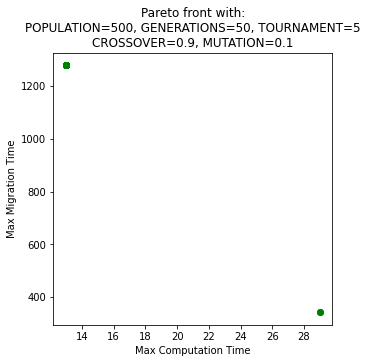

In [17]:
Individual.__instances__ = []

POPULATION_SIZE = 500
MAX_GENERATIONS = 50
TOURNAMENT_SIZE = 5
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1
test = nsga2()

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

  0%|          | 0/10 [00:00<?, ?it/s]

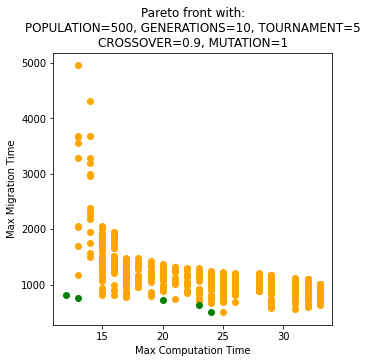

In [20]:
Individual.__instances__ = []

POPULATION_SIZE = 500
MAX_GENERATIONS = 10
TOURNAMENT_SIZE = 5
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 1
test = nsga2()

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)